In [ ]:
import pandas as pd
 
Canada = pd.read_csv('Canada_monthly.csv')

Canada.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             960 non-null    object 
 1   MONTHLY_TEMPERATURE_CALGARY      960 non-null    float64
 2   MONTHLY_TEMPERATURE_VANCOUVER    960 non-null    float64
 3   MONTHLY_TEMPERATURE_WINNIPEG     960 non-null    float64
 4   MONTHLY_TEMPERATURE_TORONTO      960 non-null    float64
 5   MONTHLY_PRECIPITATION_CALGARY    960 non-null    float64
 6   MONTHLY_PRECIPITATION_VANCOUVER  960 non-null    float64
 7   MONTHLY_PRECIPITATION_WINNIPEG   960 non-null    float64
 8   MONTHLY_PRECIPITATION_TORONTO    960 non-null    float64
dtypes: float64(8), object(1)
memory usage: 67.6+ KB


In [ ]:
Canada.describe()

,MONTHLY_TEMPERATURE_CALGARY,MONTHLY_TEMPERATURE_VANCOUVER,MONTHLY_TEMPERATURE_WINNIPEG,MONTHLY_TEMPERATURE_TORONTO,MONTHLY_PRECIPITATION_CALGARY,MONTHLY_PRECIPITATION_VANCOUVER,MONTHLY_PRECIPITATION_WINNIPEG,MONTHLY_PRECIPITATION_TORONTO
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,3.972739,10.121849,2.880028,7.812330,1.176962,3.123891,1.441746,2.137919
std,9.479565,5.303576,13.365278,9.810017,1.143151,2.140398,1.226318,1.067937
min,-25.312903,-6.332258,-26.677419,-12.600000,0.000000,0.000000,0.000000,0.136667
25%,-4.007258,5.390161,-9.623602,-1.185484,0.367742,1.399194,0.551210,1.339677
50%,4.876667,9.655699,5.075484,8.132419,0.774597,2.676382,1.051667,2.016129
75%,12.550833,14.964167,15.094113,17.017930,1.688387,4.500862,1.968306,2.697581
max,19.593548,20.600000,24.066667,24.396774,8.253333,11.693333,7.596667,7.076667


In [ ]:
print("Total count of missing values: ", Canada.isnull().sum().sum())
# There are no missing values

Total count of missing values:  0


In [ ]:
corr_matrix = Canada.corr()
corr_matrix.shape

corr_matrix['MONTHLY_TEMPERATURE_TORONTO'].sort_values(ascending=False)

MONTHLY_TEMPERATURE_TORONTO        1.000000
MONTHLY_TEMPERATURE_WINNIPEG       0.976470
MONTHLY_TEMPERATURE_VANCOUVER      0.936783
MONTHLY_TEMPERATURE_CALGARY        0.932268
MONTHLY_PRECIPITATION_WINNIPEG     0.587678
MONTHLY_PRECIPITATION_CALGARY      0.587127
MONTHLY_PRECIPITATION_TORONTO      0.220797
MONTHLY_PRECIPITATION_VANCOUVER   -0.608163
Name: MONTHLY_TEMPERATURE_TORONTO, dtype: float64

In [ ]:
new_Canada = Canada[["MONTHLY_TEMPERATURE_TORONTO", "Date"]]

In [ ]:
new_Canada['Month'] = pd.to_datetime(new_Canada['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_Canada = new_Canada[["MONTHLY_TEMPERATURE_TORONTO", "Month"]]

train_set = new_Canada[["MONTHLY_TEMPERATURE_TORONTO", "Month"]].set_index('Month')['1/1/1960':'12/1/2009']
test_set = new_Canada[["MONTHLY_TEMPERATURE_TORONTO", "Month"]].set_index('Month')['1/1/2010':'12/1/2019']

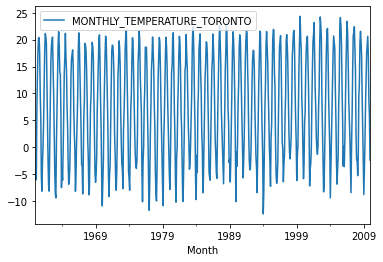

In [ ]:
train_set.plot()

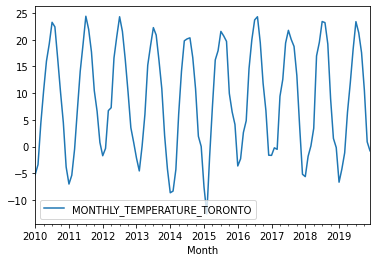

In [ ]:
test_set.plot()

In [ ]:
train_set["Time"] = np.arange(len(train_set.index))
test_set["Time"] = np.arange(len(test_set.index))

In [ ]:
X_train = train_set.drop("MONTHLY_TEMPERATURE_TORONTO", axis=1)
y_train = train_set["MONTHLY_TEMPERATURE_TORONTO"].copy()

X_test = test_set.drop("MONTHLY_TEMPERATURE_TORONTO", axis=1) # .values.astype('datetime64[D]')
y_test = test_set["MONTHLY_TEMPERATURE_TORONTO"].copy() # .values.astype('datetime64[D]')

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(600, 1)
(120, 1)
(600,)
(120,)


In [ ]:
from sklearn.metrics import mean_squared_error

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_pred = pd.Series(lin_reg.predict(X_test), index=X_test.index)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
print(lin_rmse)

10.264813394469995


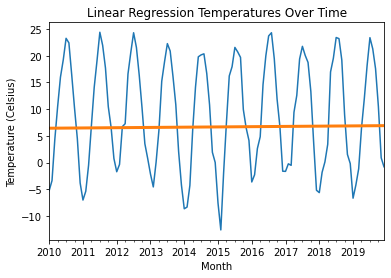

In [ ]:
import matplotlib.pyplot as plt

ax = y_test.plot()
ax = lin_pred.plot(ax=ax, linewidth=3)
ax = plt.title("Linear Regression Temperatures Over Time")
ax = plt.ylabel("Temperature (Celsius)")

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators= 3000)

forest_reg.fit(X_train, y_train)


RandomForestRegressor(n_estimators=3000)

In [ ]:

forest_pred = pd.Series(forest_reg.predict(X_test), index=X_test.index)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
print(forest_rmse)

3.3612819859696446


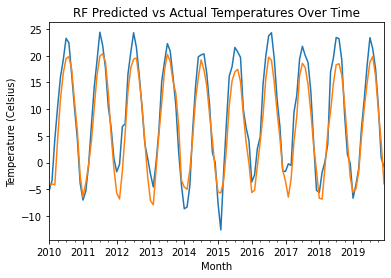

In [ ]:
ax = y_test.plot(label='Expected')
ax = forest_pred.plot(label='Predicted')
ax = plt.title("RF Predicted vs Actual Temperatures Over Time")
ax = plt.ylabel("Temperature (Celsius)")


Text(0.5, 1.0, 'RF Forecasted Temperatures')

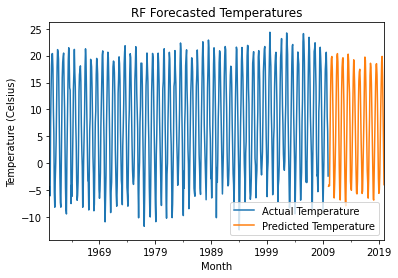

In [ ]:
data=pd.concat([new_Canada[["MONTHLY_TEMPERATURE_TORONTO", "Month"]].set_index('Month')['1/1/1960':'12/1/2009'],forest_pred])
data.rename(columns = {'MONTHLY_TEMPERATURE_TORONTO':'Actual Temperature', 0:'Predicted Temperature',}, inplace = True)
data.plot()
plt.ylabel("Temperature (Celsius)")
plt.title("RF Forecasted Temperatures")